# Visualizing QS World University Rankings


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
QS World University Rankings is an annual publication of global university rankings by Quacquarelli Symonds. <br>The QS ranking receives approval from the International Ranking Expert Group (IREG), and is viewed as one of the three most-widely read university rankings in the world, along with Academic Ranking of World Universities and Times Higher Education World University Rankings. Quacquarelli Symonds (QS) is a UK company specialising in the analysis of higher education institutions around the world. In December 2003, Richard Lambert's review of university-industry collaboration in Britain for HM Treasury, the finance ministry of the United Kingdom recommended the need for world university rankings which Lambert said would help the UK to gauge the global standing of its universities. So, the first issue of QS World Rankings was released in 2004 in partnership with Times Higher Education (THE) as <span style='color:red'>Times Higher Education - QS World University Rankings.</span> In 2009, THE split with QS and went ahead to publish its own version of rankings. QS has been publishing its university rankings in partnership with Elsevier.
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> About Data</center> </b>
</div>



<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The dataset has a total of 15 columns.
    <ul>
        <li>university - name of the university</li>
        <li>year - year of ranking</li>
        <li>rank_display - rank given to the university</li>    
        <li>score - score of the university based on the six key metrics mentioned above</li>
        <li>link - link to the university profile page on QS website</li>
        <li>country - country in which the university is located</li>
        <li>city - city in which the university is located</li>
        <li>region - continent in which the university is located</li>
        <li>logo - link to the logo of the university</li>
        <li>type - type of university (public or private)</li>
        <li>research_output - quality of research at the university</li>
        <li>student_faculty_ratio - number of students assigned to per faculty</li>
        <li>international_students - number of international students enrolled at the university</li>
        <li>size - size of the university in terms of area</li>
        <li>faculty_count - number of faculty or academic staff at the university</li>
    </ul>
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: black"> 
    <b> <center> Import Libraries </center> </b>
</div>

In [46]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.family'] = 'monospace'
import seaborn as sns
import geopandas as gpd
import missingno as msno
import re

import warnings
warnings.filterwarnings("ignore")




<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: black"> 
    <b> <center> Custom Color Palette</center> </b>
</div>

In [47]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

research_palette = ['#FA6E4F','#8EC9BB']

student_faculty_palette = ['#003f5c','#ff6361']

international_palette = ['#ffcf6a','#628d82']

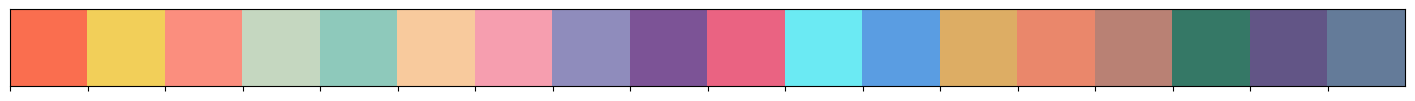

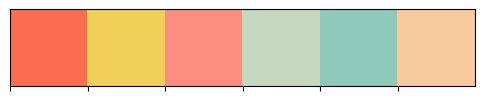

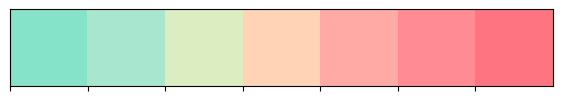

In [48]:
sns.palplot(sns.color_palette(long_palette))
sns.palplot(sns.color_palette(short_palette))
sns.palplot(sns.color_palette(watermelon_colors))

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: black"> 
    <b> <center> Load and Explore data</center> </b>
</div>

In [49]:
df = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')

In [50]:
df.head(2000)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Korea University,2019,86,62.7,https://www.topuniversities.com/universities/k...,South Korea,Seoul,Asia,https://www.topuniversities.com/sites/default/...,Private,Very High,6.0,"3,325",L,"4,026"
1996,Rice University,2019,87,62.6,https://www.topuniversities.com/universities/r...,United States,Houston,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,7.0,"2,278",M,996
1997,Universiti Malaya (UM),2019,87,62.6,https://www.topuniversities.com/universities/u...,Malaysia,Kuala Lumpur,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,"3,340",L,"2,386"
1998,The Ohio State University,2019,89,62.4,https://www.topuniversities.com/universities/o...,United States,Columbus,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,"7,029",XL,"6,388"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: black"> 
    <b> <center> Data Cleaning and Preprocessing </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
        We can see from the dataset info() method that there are many null values across multiple columns. Let's take a look at the number of null values.
</div>

In [52]:
pd.DataFrame(df.isnull().sum(), columns=['No of missing values'])

,No of missing values
university,0
year,0
rank_display,68
score,3662
link,0
country,0
city,178
region,0
logo,0
type,12


In [53]:
missing_percent = round(df.isna().mean() * 100,1)
pd.DataFrame(missing_percent[missing_percent > 0], columns=['% of Missing Values'])

,% of Missing Values
rank_display,1.0
score,56.5
city,2.7
type,0.2
student_faculty_ratio,1.2
international_students,2.5
faculty_count,1.2


<Axes: >

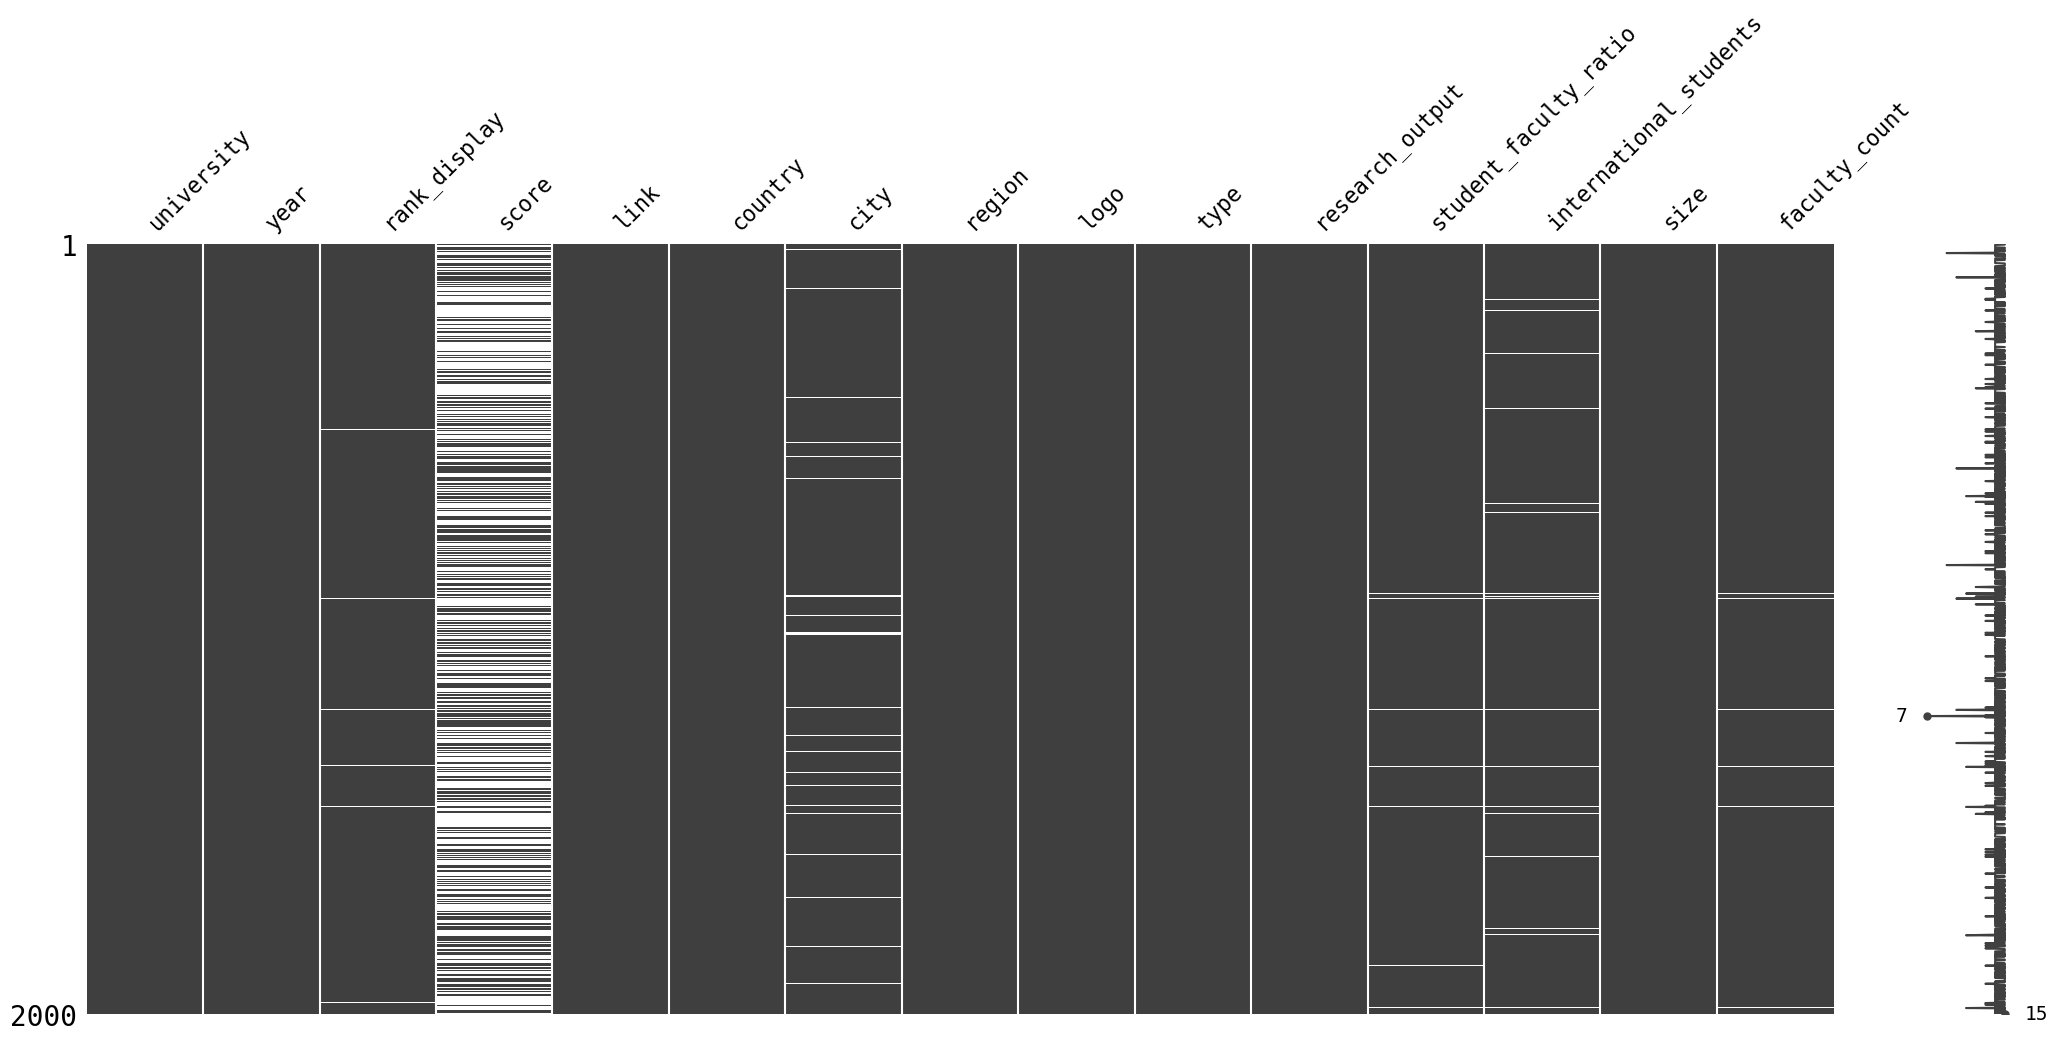

In [54]:
msno.matrix(df.sample(2000))

<Axes: >

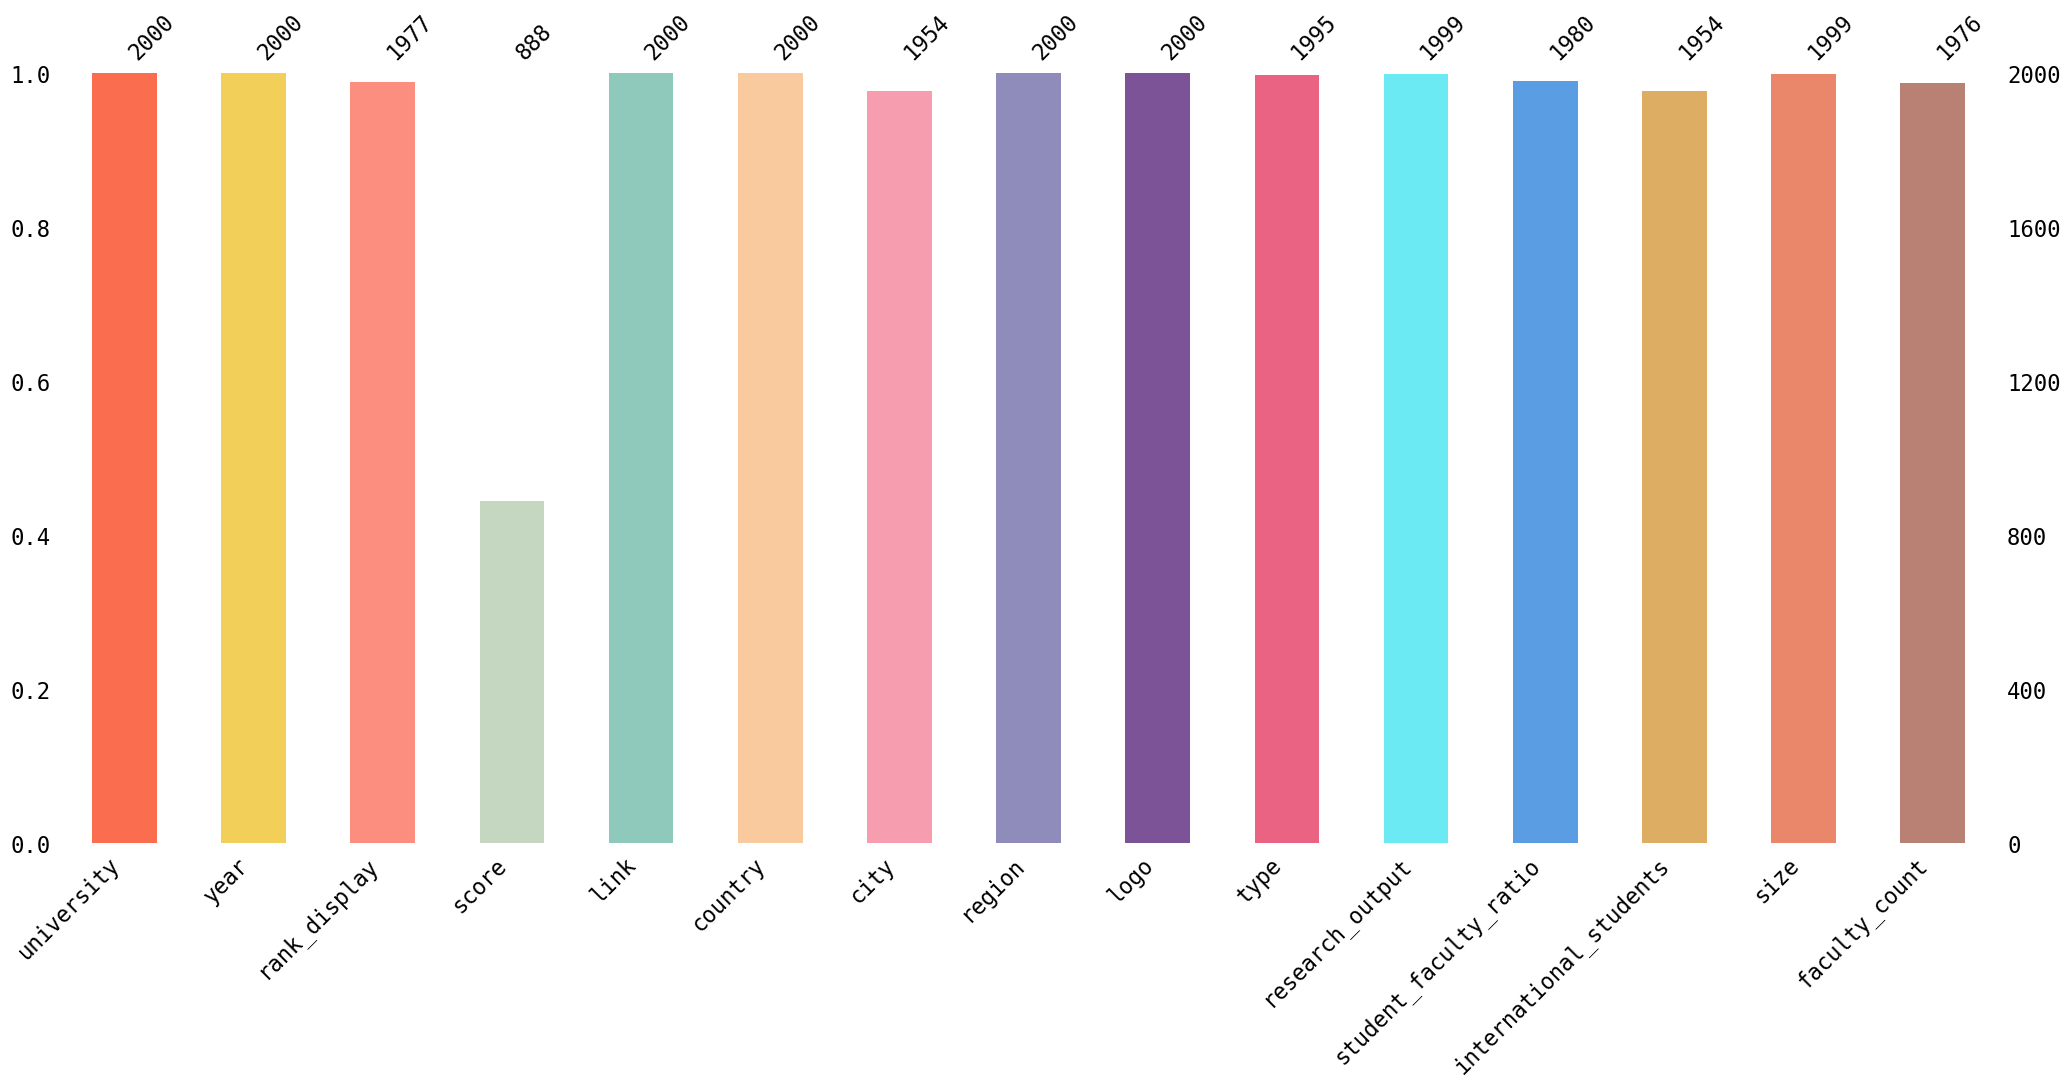

In [55]:
msno.bar(df.sample(2000), color=custom_palette1)

<Axes: >

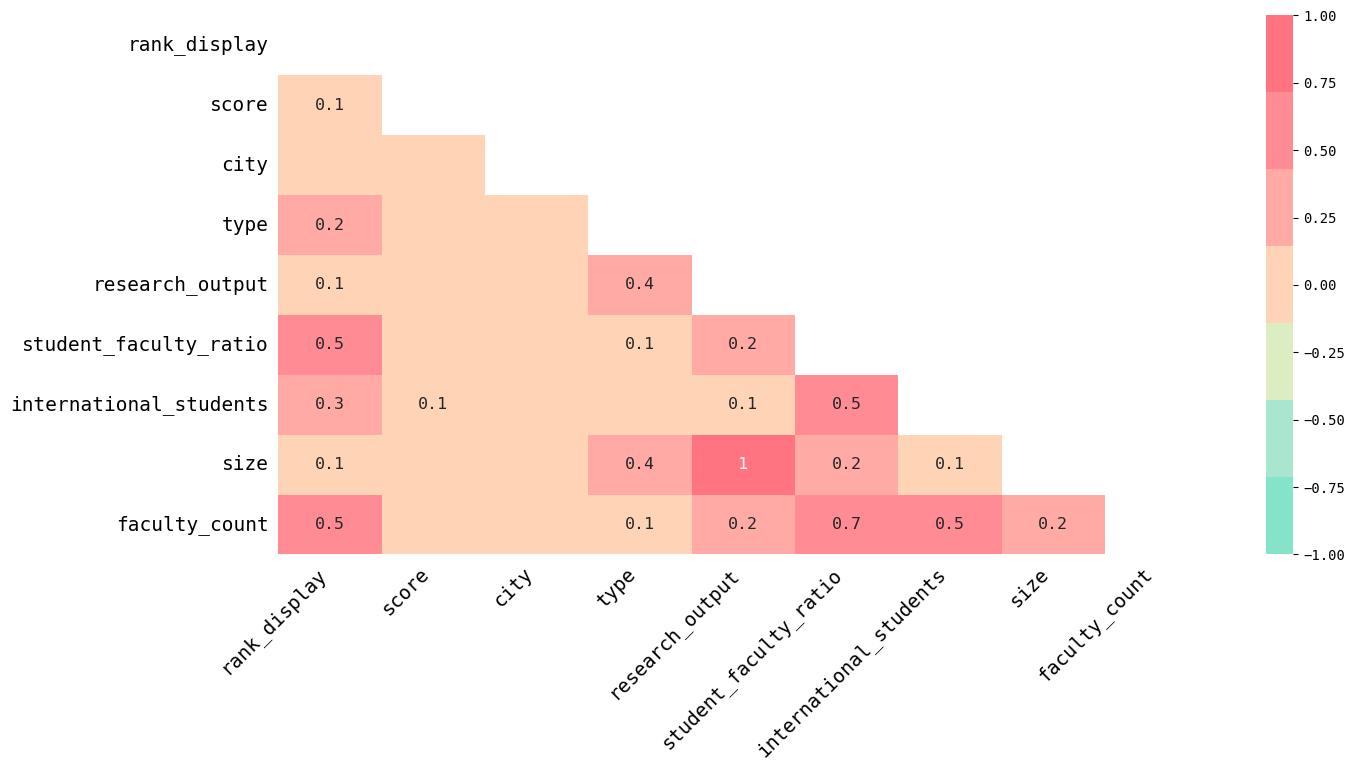

In [56]:
cmap = ListedColormap(custom_palette3, name='cmap1')

msno.heatmap(df, cmap=cmap, figsize=(15, 7), fontsize=14)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Since multiple columns have missing values, let's drop rows that have more than 4 missing values because we can't work with a university that's missing a lot of its attributes.
</div>

In [57]:
print(len(df[df.isnull().sum(axis=1) > 4]))
drop_idx = df[df.isnull().sum(axis=1) > 4].index.tolist()
df.drop(drop_idx, inplace=True)
print('Rows which have more 4 null values have been dropped')

22
Rows which have more 4 null values have been dropped


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Let's drop 'link' and 'logo' column as they are hyperlinks. Although 'score' column can be very useful for analysis, its missing nearly 56% values. When I looked for these values on the QS website, I could see they have given a score only for the top 500 universities although 1000+ universities have been ranked. So, I'm ignoring this column as well.
</div>

In [58]:
df.drop(['link', 'logo', 'score'], axis=1, inplace=True)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Converting the 'international_students', 'faculty_count' and 'rank_display' column to numerical by removing all the special characters in them. 
</div>

In [59]:
df['research_output'] = df['research_output'].replace('Very high', 'Very High')
df['international_students'] = df['international_students'].apply(lambda x: float(str(x).replace(',', '')))

In [60]:
df['faculty_count'] = df['faculty_count'].apply(lambda x: float(str(x).replace(',', '')))      
df['rank_display'] = df['rank_display'].apply(lambda x: float(re.sub(r'\W+', '', str(x))))

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Visualizing universities by year and type </center> </b>
</div>

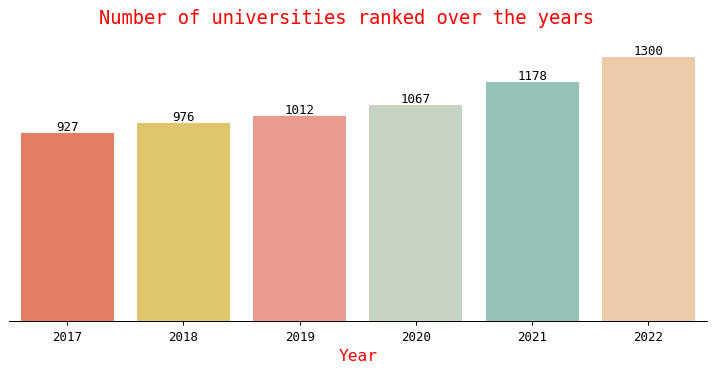

In [61]:
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.get_yaxis().set_visible(False)


sns.countplot(df, x='year', palette=custom_palette1);

# add values on top of each bar
ax.bar_label(ax.containers[0])
ax.set_xlabel('Year', fontsize=13, color = 'red');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = 'red');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    With each year, more and more universities are considered for the rankings and 2022 has the highest number of universities.
</div>

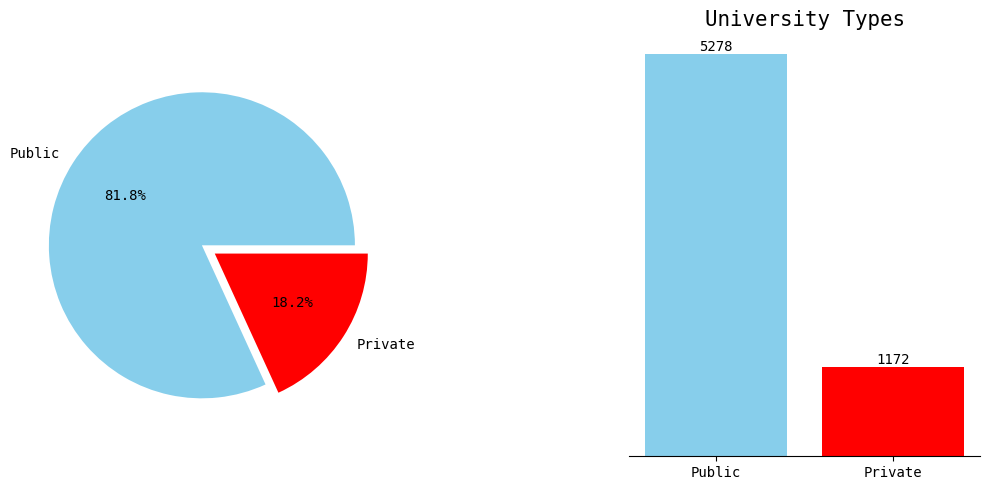

In [62]:
type_df = df['type'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

pie_bar_colors = ['skyblue','red']
explode = [0,0.1]
ax1.pie(df['type'].value_counts().values, labels = df['type'].value_counts().index ,explode=explode, colors=pie_bar_colors, autopct='%1.1f%%') 
ax1.axis('equal')

ax2.bar(df['type'].value_counts().index, df['type'].value_counts().values, color=pie_bar_colors) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=True)
ax2.get_yaxis().set_visible(False)
plt.title("University Types", fontsize=15, color = 'black');

ax2.bar_label(ax2.containers[0])

fig.tight_layout()
fig.subplots_adjust(wspace=0.7)

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Universities by Countries</center> </b>
</div>

In [63]:
print('Number of countries with ranked universities: ',df['country'].nunique())

Number of countries with ranked universities:  97


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Out of the 195 countries in the world, only 97 countries have universities that are ranked.
</div>

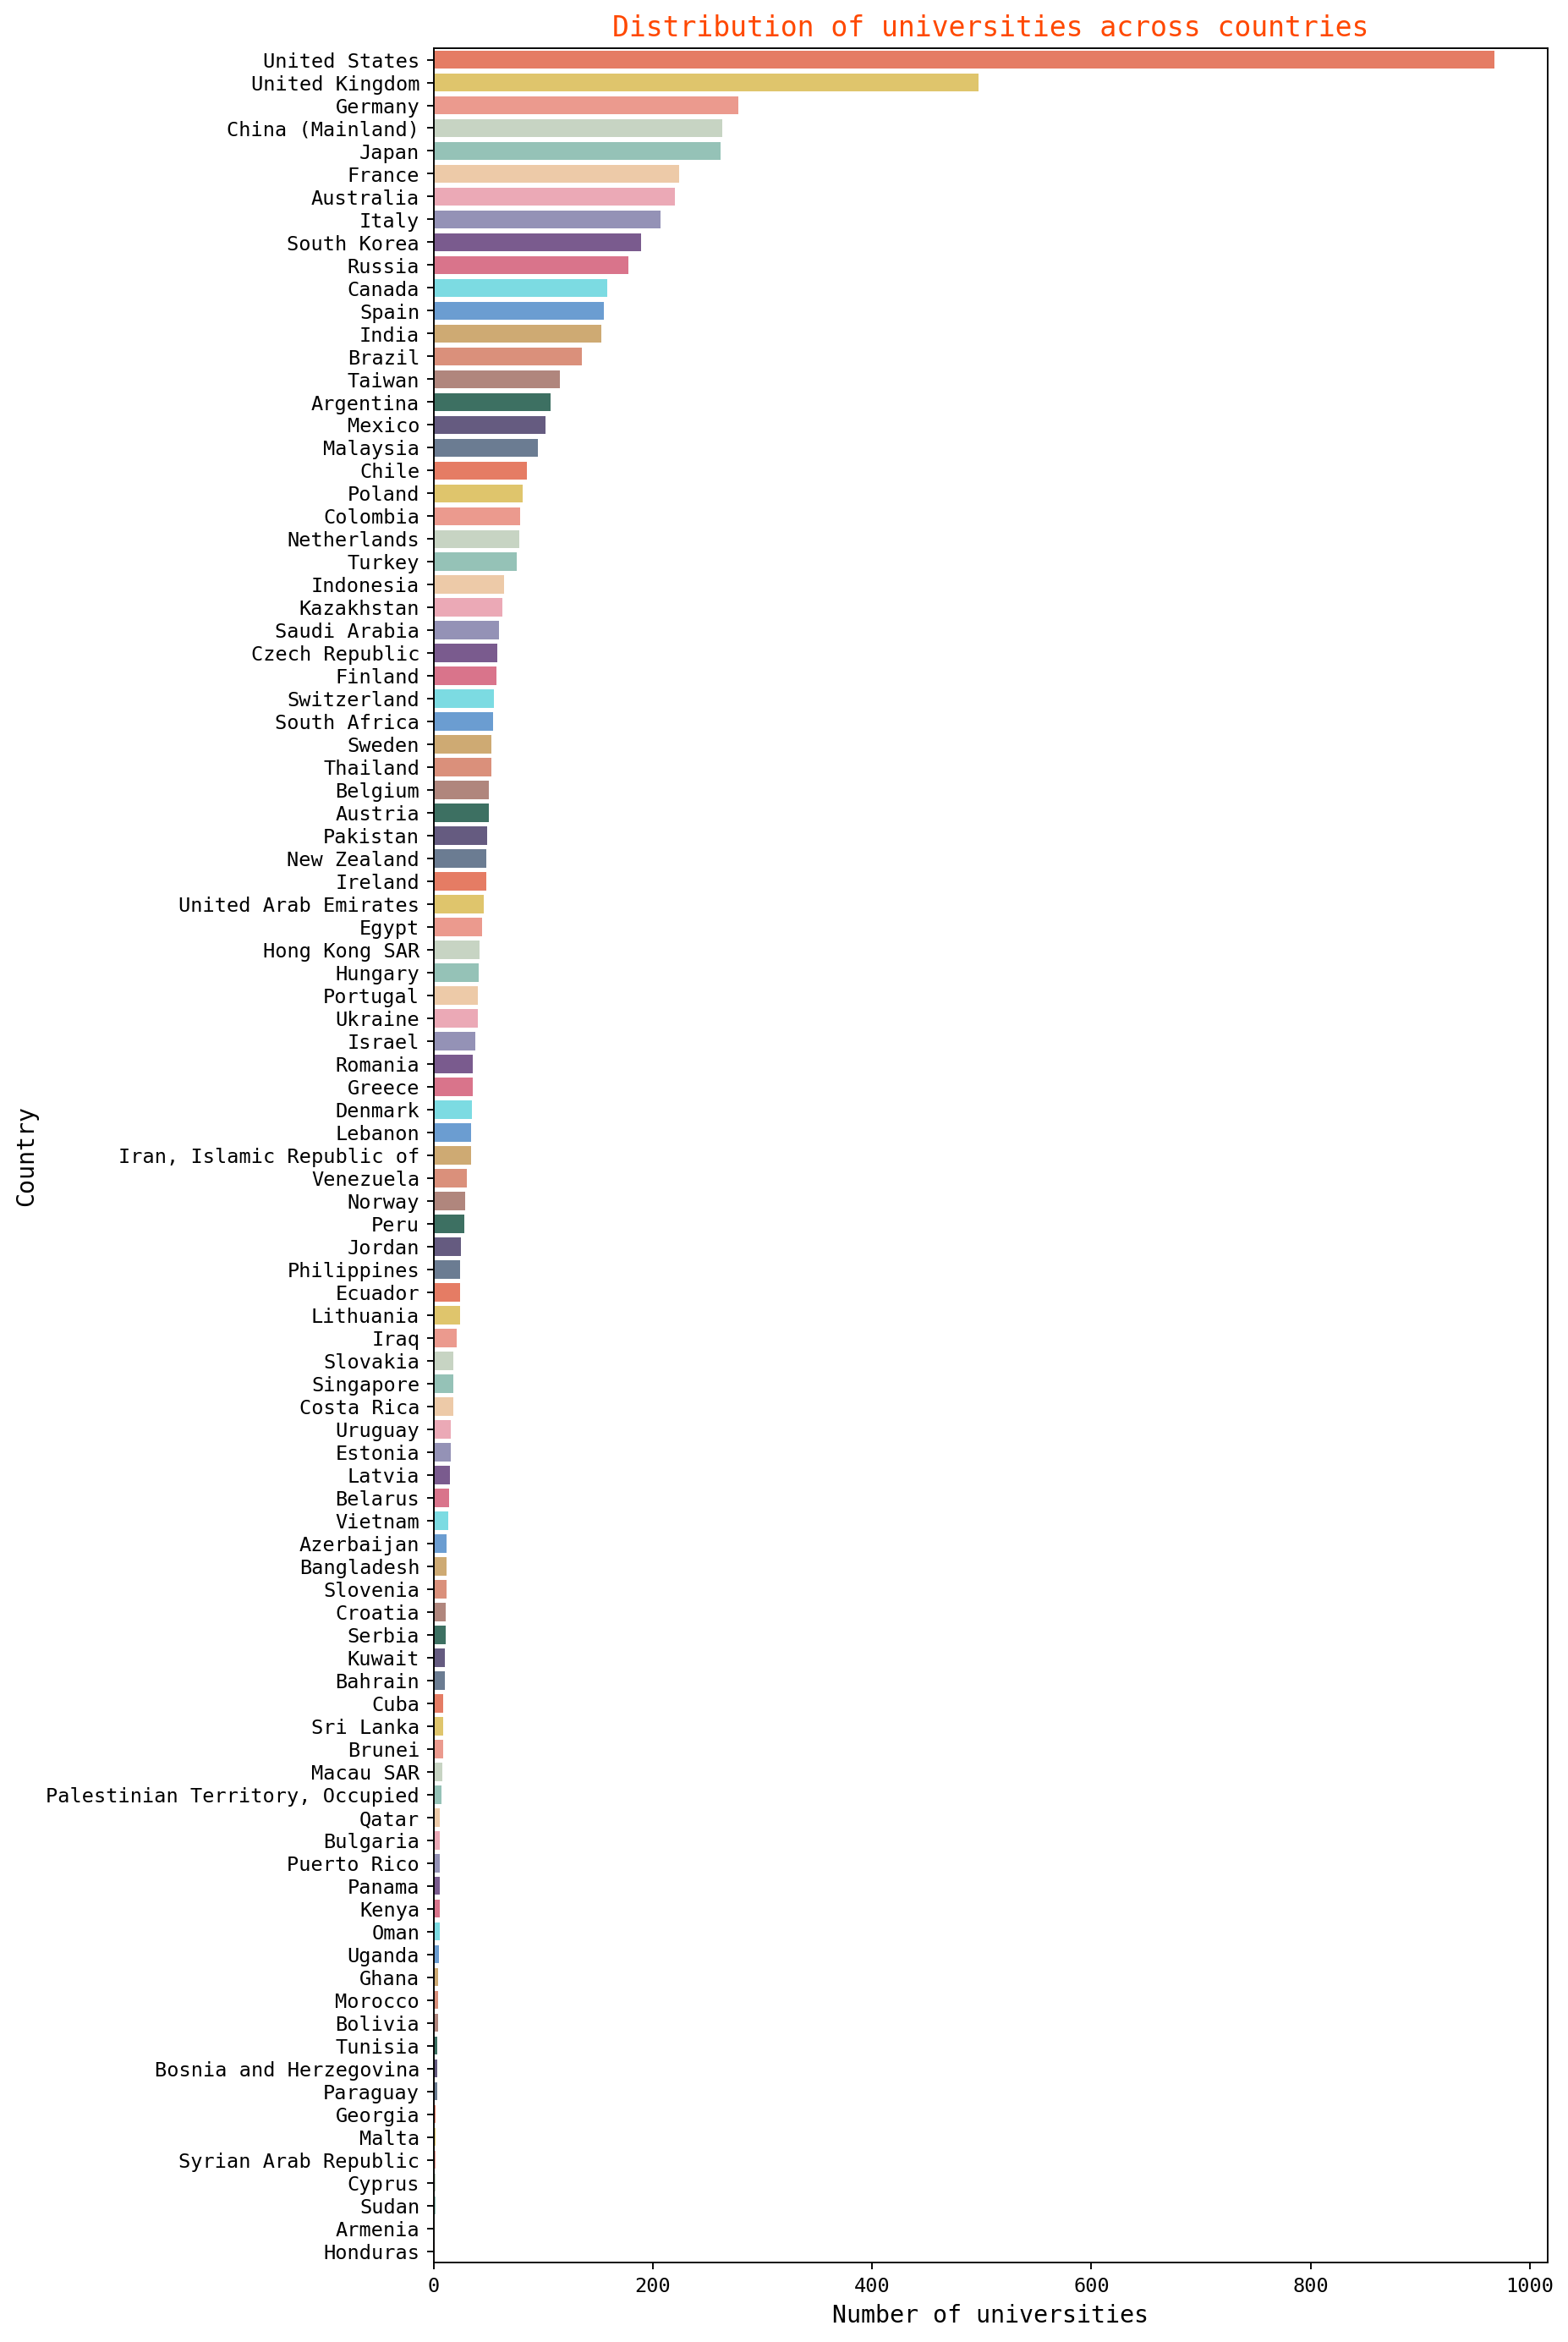

In [64]:
uni_df = df['university'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi=170)

sns.countplot(data=df, y='country', order=df.country.value_counts().index, palette=custom_palette1)
plt.xlabel('Number of universities', fontsize=12, color = 'black')
plt.ylabel('Country', fontsize=12, color='black')
plt.title("Distribution of universities across countries", fontsize=14, color = '#ff4800');

# plt.savefig('countrywise.png')

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
   United States consists of more number of universities that have been ranked over the years followed by United Kingdom and Germany.
</div>

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Universities by Cities</center> </b>
</div>

In [65]:
sorted_df = df.sort_values(by='rank_display').drop_duplicates('university')
sorted_df = pd.DataFrame(sorted_df['city'].value_counts()[:20])
print(sorted_df.mean())

city    9.9
dtype: float64


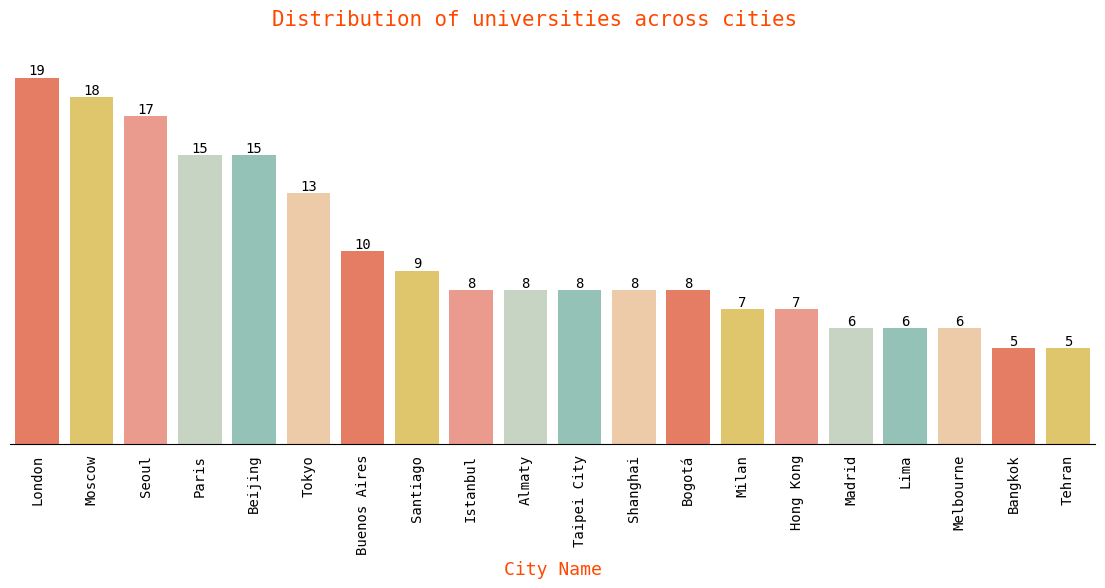

In [66]:
fig, ax = plt.subplots(figsize=(14,5), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.barplot(data=sorted_df, y='city', x=sorted_df.index, palette=custom_palette2)
plt.xticks(rotation=90)

ax.bar_label(ax.containers[0])

ax.set_xlabel('City Name', fontsize=13, color = '#ff4800');
fig.suptitle('Distribution of universities across cities', fontsize=15, color = '#ff4800');

# plt.savefig('countrywise.png')

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The above graph considers the top 20 cities with high number of unique universities. London is an academic hotspot with a whooping 19 universities that are ranked globally!
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Ranking of Top 10 Universities</center> </b>
</div>

In [67]:
df.sort_values('rank_display')[:10]
df.head(10)


,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1.0,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2.0,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3.0,United States,Cambridge,North America,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4.0,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5.0,United States,Pasadena,North America,Private,Very High,2.0,692.0,S,968.0
5,University of Oxford,2017,6.0,United Kingdom,Oxford,Europe,Public,Very High,3.0,8442.0,L,6708.0
6,UCL,2017,7.0,United Kingdom,London,Europe,Public,Very High,5.0,21824.0,XL,7195.0
7,ETH Zurich - Swiss Federal Institute of Techno...,2017,8.0,Switzerland,Zürich,Europe,Public,Very High,7.0,7733.0,L,2719.0
8,Imperial College London,2017,9.0,United Kingdom,London,Europe,Public,Very High,5.0,11143.0,L,8000.0
9,University of Chicago,2017,10.0,United States,Chicago,North America,Private,Very High,6.0,4696.0,L,2703.0


<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> 
        Contributing Factors</center> </b>
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Research Output 🔬</center> </b>
</div>


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
   Next to teaching, Academic research is viewed as a very important factor. Understanding research output can give us insights about how the top universities prioritize them.
</div>
<br>
<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
   Наряду с преподаванием, академические исследования рассматриваются как очень важный фактор. Понимание результатов исследований может дать нам представление о том, как ведущие университеты расставляют им приоритеты.
</div>

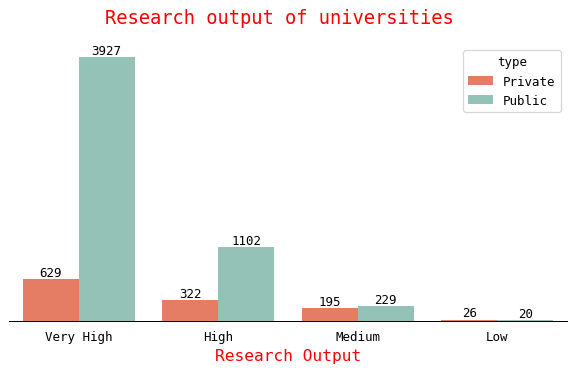

In [68]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='research_output', hue='type', palette=research_palette);

for container in ax.containers:
    ax.bar_label(container)


ax.set_xlabel('Research Output', fontsize=13, color = 'red');
fig.suptitle('Research output of universities', fontsize=15, color = 'red');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Clearly, most number of universities under consideration have "Very High" research output. Public universities outperform private universities in terms of research.
</div>
<br>
<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Очевидно, что большинство рассматриваемых университетов имеют "очень высокие" результаты исследований. Государственные университеты превосходят частные университеты по объему исследований.
</div>

In [69]:
research_size = pd.DataFrame(df.groupby(['research_output']).apply(lambda df: df['size'].value_counts()))

In [70]:
research_size

size
research_output         
High            L    767
                XL   380
                M    204
                S     73
Low             M     20
                L     10
                S     10
                XL     6
Medium          L    197
                XL   106
                M     99
                S     22
Very High       L   2088
                XL  1139
                M   1066
                S    273

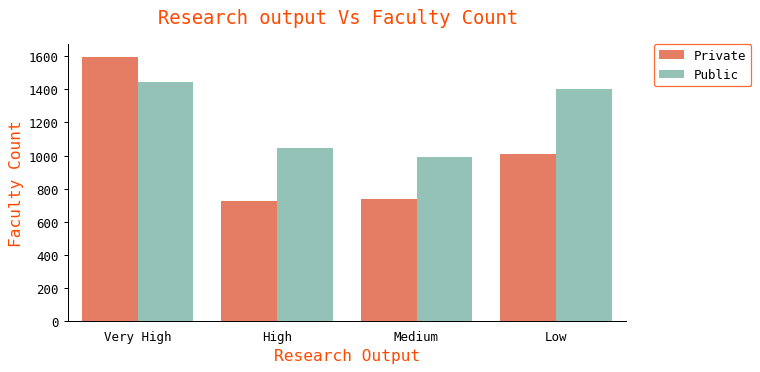

In [71]:
fig, ax = plt.subplots(figsize=(8,4), dpi=90)

sns.barplot(data=df, x='research_output', y='faculty_count', hue='type', ci=None, palette=research_palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)
ax.set_xlabel('Research Output', fontsize=13, color = '#ff4800')
ax.set_ylabel('Faculty Count', fontsize=13, color = '#ff4800')

ax.legend(edgecolor='#ff4800',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Research output Vs Faculty Count', fontsize=15, color = '#ff4800');

As far as the number of faculty are concerned,<br>
Universities with "Very High" research output have more staffs.<br>
So, does this mean universities with higher number of faculty do better research? Not necessarily. Universities with "Very High"<br> research output may attract more accomplished academics and researchers because of their reputation along with many other<br> factors.<br>
We can see public universities with research output as "Very High" and "Low" have nearly equal number of staffs.<br>
Also, private universities with "Low" research output have more staffs than "High" output.<br>
This can mean that, not every university puts an emphasis on research although they have more number of academic staff.<br>

<br>
Что касается количества профессорско-преподавательского состава, 

 Университеты с "очень высокими" результатами исследований имеют больше сотрудников.
 Итак, означает ли это, что университеты с большим числом профессорско-преподавательского состава проводят лучшие исследования? Необязательно. Университеты с "очень высокими" результатами исследований могут привлекать более опытных академиков и исследователей благодаря своей репутации наряду со многими другими факторами.
 Мы видим, что государственные университеты с результатами исследований "Очень высокими" и "низкими" имеют почти равное количество сотрудников.
 Кроме того, частные университеты с "низкой" результативностью исследований имеют больше сотрудников, чем с "высокой" результативностью.
 Это может означать, что не каждый университет делает акцент на исследованиях, хотя у них больше профессорско-преподавательского состава.<br>
 

In [72]:
research_size = research_size.reset_index().rename(columns={'level_1': 'size', 'size': 'count'})

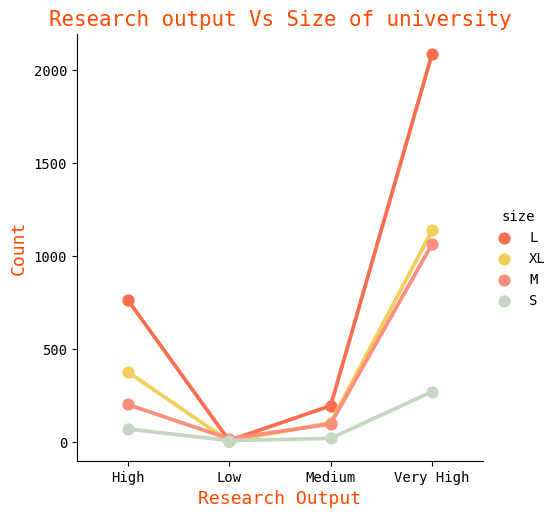

In [73]:
sns.catplot(x="research_output", y="count", kind="point", data=research_size, hue='size', palette=custom_palette1);
plt.xlabel('Research Output', fontsize=13, color = '#ff4800')
plt.ylabel('Count', fontsize=13, color = '#ff4800')
plt.title('Research output Vs Size of university', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    The relationship between the size of the university and research output is pretty candid. Universities with "Very High" and "High" research output are larger in size comapare to "Medium" and "Low".
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Student Faculty Ratio 👩🏻‍🎓→🧑🏻‍🏫</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    Student Faculty Ratio is an interesting measure. According to QS, "It is usually cited by students as a metric of highest importance to them". Lesser the ratio, higher the performance. A faculty with less number of students assigned to them can dedicate more focus and attention on each individual.<br>
    Соотношение студентов и преподавательского состава - интересный показатель. Согласно QS, "студенты обычно указывают на это как на показатель, имеющий для них наивысшую важность". Чем меньше коэффициент, тем выше производительность. Факультет с меньшим количеством закрепленных за ним студентов может уделять больше внимания каждому отдельному человеку.
</div>

In [74]:
df['student_faculty_ratio'].describe()

count    6407.000000
mean       13.264554
std         6.604294
min         1.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        67.000000
Name: student_faculty_ratio, dtype: float64

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <ul>
        <li>On average, universities tend to have 13 students per faculty.</li>
        <li>There are universities that have as low as 1 student per faculty.</li>
        <li>While there are universities that have 67 students per faculty.</li>
    </ul>
</div>



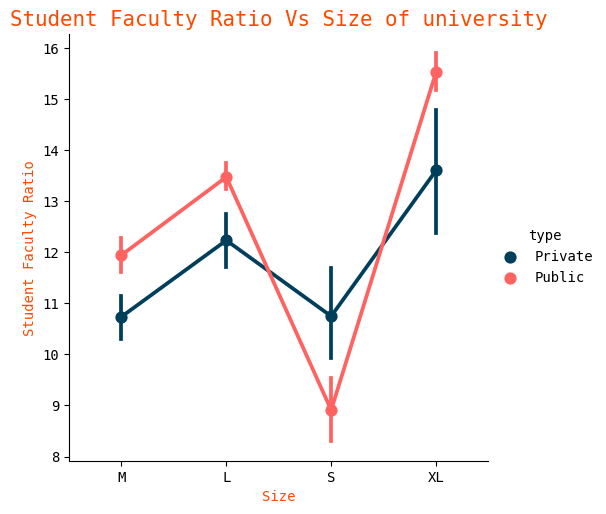

In [75]:
sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=df, hue='type', palette=student_faculty_palette);
plt.xlabel('Size', color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio Vs Size of university', fontsize=15, color = '#ff4800');

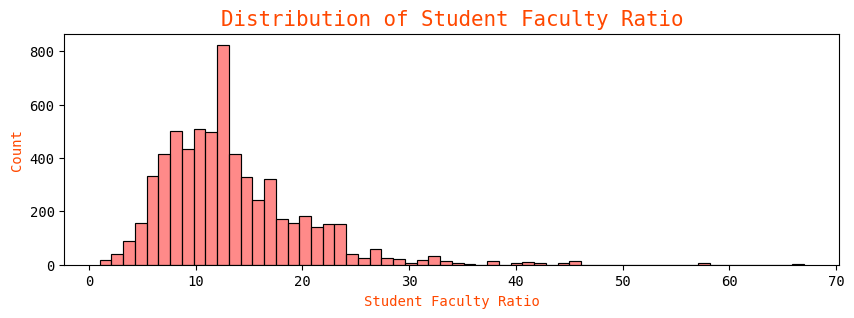

In [83]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=df, x='student_faculty_ratio', bins=60, color=student_faculty_palette[1]);
plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
   We have a right skewed distribution. The outliers doesn't seem to affect the mean much. Most of the universities have somewhere between 5 to 20 students per faculty.
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> International Students
        </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    A university that attracts students from across the world demonstrates a global outlook and possess a multicultural diversity in its campus.
</div>

In [77]:
df['international_students'].describe()

count     6318.000000
mean      1989.934535
std       3506.326287
min          1.000000
25%          4.024000
50%        473.000000
75%       2654.000000
max      31049.000000
Name: international_students, dtype: float64

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <ul>
        <li>On average, universities tend to have 1900+ international students.</li>
        <li>There is a university with its international students intake as high as 31,000+. Let's take a look at it.</li>
    </ul>
</div>


In [78]:
df.iloc[df['international_students'].idxmax()]

university                Monash University
year                                   2017
rank_display                           65.0
country                           Australia
city                              Melbourne
region                              Oceania
type                                 Public
research_output                   Very High
student_faculty_ratio                  15.0
international_students              31049.0
size                                     XL
faculty_count                        3852.0
Name: 64, dtype: object

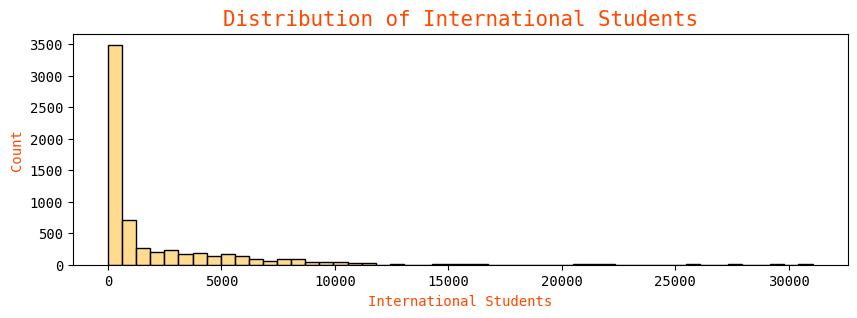

In [82]:
plt.figure(figsize=(10,3), dpi=100)
sns.histplot(data=df, x='international_students', bins=50, color=international_palette[0]);
plt.xlabel('International Students', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of International Students', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
   We have a right skewed distribution here as well. There are very few outliers. Most of the universities have an intake between 0 to 5000.
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> Most popular country of choice for International Students</center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    And for the last part, which country is most popular among international students? Can you guess before going down?
</div>

In [79]:
intstu_country = pd.DataFrame(df.groupby(['country'])['international_students'].sum().sort_values(ascending=False)[:10])

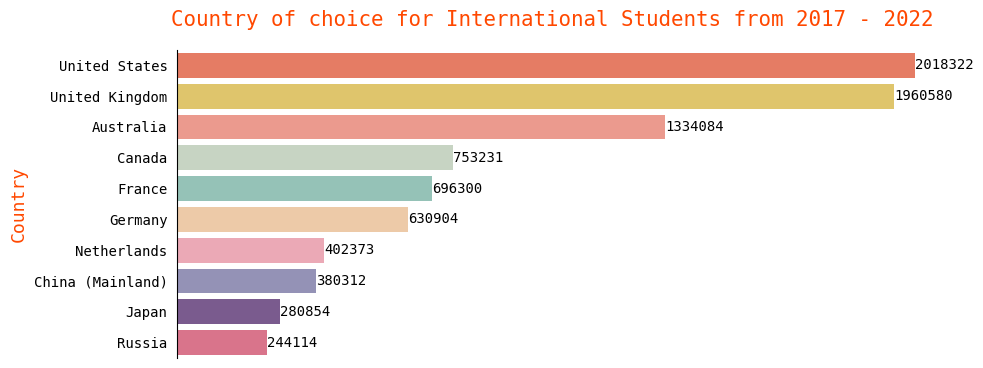

In [84]:
fig, ax = plt.subplots(figsize=(10,4), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False)
ax.get_xaxis().set_visible(False)

sns.barplot(data=intstu_country, x='international_students', y=intstu_country.index, palette=custom_palette1);

ax.bar_label(ax.containers[0], fmt = '%d')

ax.set_ylabel('Country', fontsize=13, color = '#ff4800');
fig.suptitle('Country of choice for International Students from 2017 - 2022', fontsize=15, color = '#ff4800');

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    It's USA 🇺🇸 closely followed by UK 🇬🇧!
</div>